In [4]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [5]:
# Load the saved models and their metrics
cnn_checkpoint = torch.load('cnn_model.pth')
qcnn_checkpoint = torch.load('qcnn_model.pth')

C:\Users\Asus\AppData\Local\Temp\ipykernel_51128\4250313353.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cnn_checkpoint = torch.load('cnn_model.pth')
C:\Users\Asus\Ap

In [6]:
# Extract model metrics
cnn_train_losses = cnn_checkpoint['train_losses']
cnn_train_accuracies = cnn_checkpoint['train_accuracies']
cnn_val_losses = cnn_checkpoint['val_losses']
cnn_val_accuracies = cnn_checkpoint['val_accuracies']

qcnn_train_losses = qcnn_checkpoint['train_losses']
qcnn_train_accuracies = qcnn_checkpoint['train_accuracies']
qcnn_val_losses = qcnn_checkpoint['val_losses']
qcnn_val_accuracies = qcnn_checkpoint['val_accuracies']

In [7]:
# Create a comparison matrix using pandas DataFrame
comparison_df = pd.DataFrame({
    'Epoch': list(range(1, len(cnn_train_losses) + 1)),
    'CNN Train Loss': cnn_train_losses,
    'CNN Train Accuracy (%)': cnn_train_accuracies,
    'CNN Val Loss': cnn_val_losses,
    'CNN Val Accuracy (%)': cnn_val_accuracies,
    'QCNN Train Loss': qcnn_train_losses,
    'QCNN Train Accuracy (%)': qcnn_train_accuracies,
    'QCNN Val Loss': qcnn_val_losses,
    'QCNN Val Accuracy (%)': qcnn_val_accuracies
})

In [8]:
# Display the comparison matrix
print(comparison_df)

     Epoch  CNN Train Loss  CNN Train Accuracy (%)  CNN Val Loss  \
0        1        0.217305             -250.626694      0.143433   
1        2        0.116059              -50.927182      0.061741   
2        3        0.050992               -1.156134      0.041381   
3        4        0.039609                2.845224      0.039744   
4        5        0.036599               13.935535      0.035207   
..     ...             ...                     ...           ...   
195    196        0.000885               98.077950      0.000786   
196    197        0.000887               98.063796      0.000792   
197    198        0.000884               98.114041      0.000772   
198    199        0.000886               98.048827      0.000798   
199    200        0.000884               98.055564      0.000795   

     CNN Val Accuracy (%)  QCNN Train Loss  QCNN Train Accuracy (%)  \
0             -250.626694         0.018949                86.960460   
1              -50.927182         0.00546

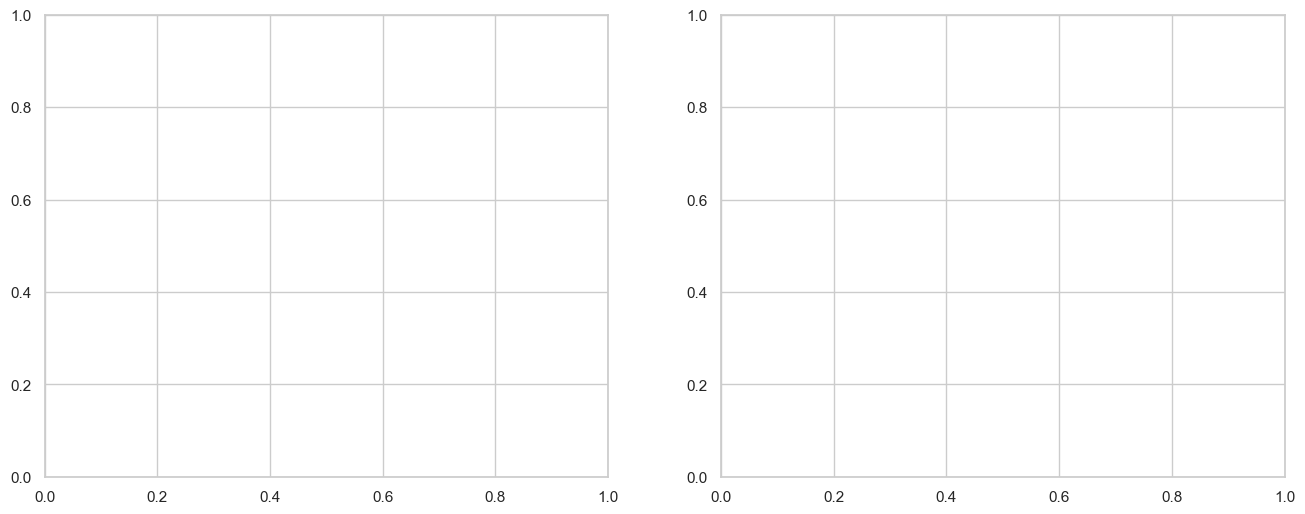

In [9]:
# Set the plotting style
sns.set(style="whitegrid")

# Create subplots for Loss and Accuracy
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

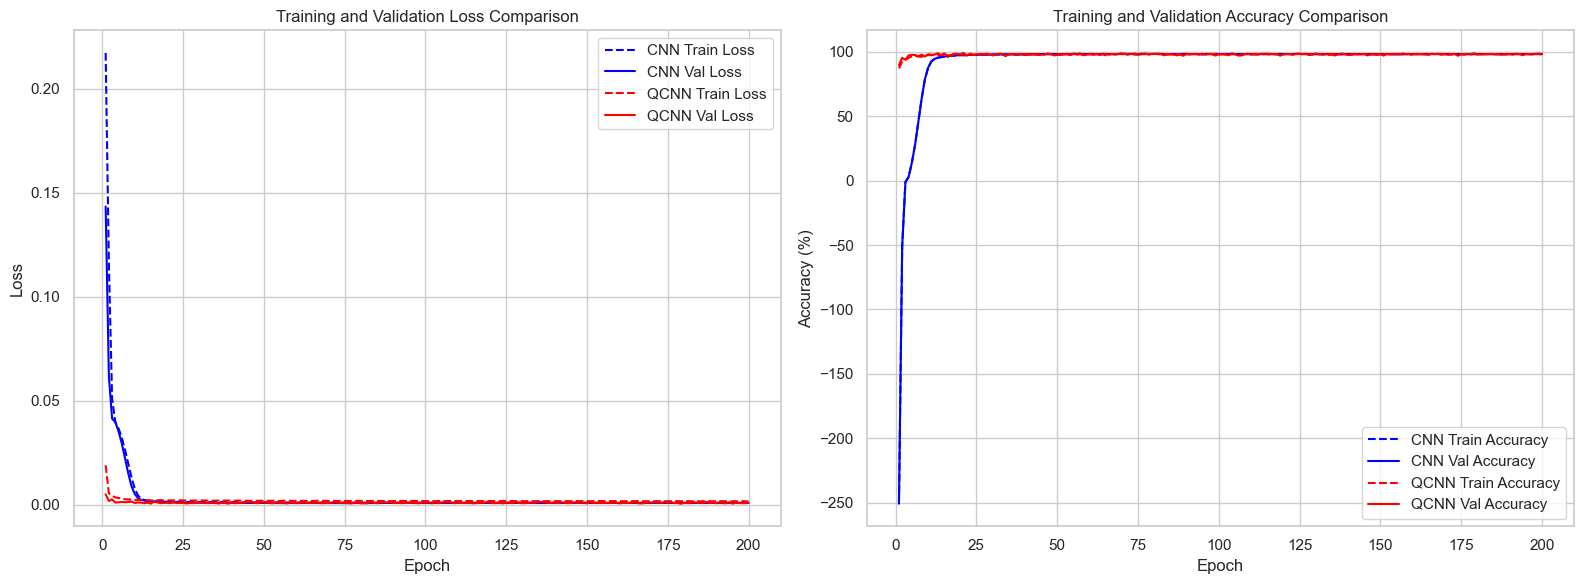

In [16]:
# Create subplots for Loss and Accuracy
fig, ax = plt.subplots(1, 2, figsize=(16, 6))


# Plot Training and Validation Loss
ax[0].plot(comparison_df['Epoch'], comparison_df['CNN Train Loss'], label='CNN Train Loss', color='blue', linestyle='--')
ax[0].plot(comparison_df['Epoch'], comparison_df['CNN Val Loss'], label='CNN Val Loss', color='blue')
ax[0].plot(comparison_df['Epoch'], comparison_df['QCNN Train Loss'], label='QCNN Train Loss', color='red', linestyle='--')
ax[0].plot(comparison_df['Epoch'], comparison_df['QCNN Val Loss'], label='QCNN Val Loss', color='red')

ax[0].set_title('Training and Validation Loss Comparison')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()


# Plot Training and Validation Accuracy
ax[1].plot(comparison_df['Epoch'], comparison_df['CNN Train Accuracy (%)'], label='CNN Train Accuracy', color='blue', linestyle='--')
ax[1].plot(comparison_df['Epoch'], comparison_df['CNN Val Accuracy (%)'], label='CNN Val Accuracy', color='blue')
ax[1].plot(comparison_df['Epoch'], comparison_df['QCNN Train Accuracy (%)'], label='QCNN Train Accuracy', color='red', linestyle='--')
ax[1].plot(comparison_df['Epoch'], comparison_df['QCNN Val Accuracy (%)'], label='QCNN Val Accuracy', color='red')

ax[1].set_title('Training and Validation Accuracy Comparison')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy (%)')
ax[1].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()